## Data Set Information
---
The two datasets are related to red and white variants of the Portuguese "Vinho Verde" wine. For more details, consult: [Web Link] or the reference [Cortez et al., 2009]. Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.). 

These datasets can be viewed as **classification** or **regression** tasks. The classes are ordered and not balanced (e.g. there are munch more normal wines than excellent or poor ones). Outlier detection algorithms could be used to detect the few excellent or poor wines. Also, we are not sure if all input variables are relevant. So it could be interesting to test feature selection methods. 

---

### Attribute Information:

* 1 - fixed acidity 
* 2 - volatile acidity 
* 3 - citric acid 
* 4 - residual sugar 
* 5 - chlorides 
* 6 - free sulfur dioxide 
* 7 - total sulfur dioxide 
* 8 - density 
* 9 - pH 
* 10 - sulphates 
* 11 - alcohol 
* 12 - quality (score between 0 and 10)


In [431]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats
from IPython.display import Markdown, display
import warnings

warnings.filterwarnings('ignore')
def printmd(string):
    display(Markdown(string))

In [432]:
csv = pd.read_csv('./data/data.csv', delimiter=';')
csv.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
5,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
6,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,6
7,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
8,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
9,8.1,0.22,0.43,1.5,0.044,28.0,129.0,0.9938,3.22,0.45,11.0,6


In [433]:
csv.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [434]:
# https://www.datascience.com/blog/introduction-to-correlation-learn-data-science-tutorials
csv.info() # => check dataset count integrity

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
fixed acidity           4898 non-null float64
volatile acidity        4898 non-null float64
citric acid             4898 non-null float64
residual sugar          4898 non-null float64
chlorides               4898 non-null float64
free sulfur dioxide     4898 non-null float64
total sulfur dioxide    4898 non-null float64
density                 4898 non-null float64
pH                      4898 non-null float64
sulphates               4898 non-null float64
alcohol                 4898 non-null float64
quality                 4898 non-null int64
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


---
**Pearson**'s correlation assumes a linear relationship between 2 random variables X and Y.
* for linearly independent variables ρ = 0
* ρ > 0 then an increase of X implies an increase of Y
* ρ < 0 then an increase of X implies a decrease of Y

**Spearman**'s correlation uses a similar technique based on variable rank.

**Kendall's τ** uses variable ranks with concordant/discordant pairs - it does not take into account the difference between ranks, only directional agreement.

---

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.022697,0.289181,0.089021,0.023086,-0.049396,0.091070,0.265331,-0.425858,-0.017143,-0.120881,-0.113663
volatile acidity,-0.022697,1.000000,-0.149472,0.064286,0.070512,-0.097012,0.089261,0.027114,-0.031915,-0.035728,0.067718,-0.194723
citric acid,0.289181,-0.149472,1.000000,0.094212,0.114364,0.094077,0.121131,0.149503,-0.163748,0.062331,-0.075729,-0.009209
residual sugar,0.089021,0.064286,0.094212,1.000000,0.088685,0.299098,0.401439,0.838966,-0.194133,-0.026664,-0.450631,-0.097577
chlorides,0.023086,0.070512,0.114364,0.088685,1.000000,0.101392,0.198910,0.257211,-0.090439,0.016763,-0.360189,-0.209934
free sulfur dioxide,-0.049396,-0.097012,0.094077,0.299098,0.101392,1.000000,0.615501,0.294210,-0.000618,0.059217,-0.250104,0.008158
total sulfur dioxide,0.091070,0.089261,0.121131,0.401439,0.198910,0.615501,1.000000,0.529881,0.002321,0.134562,-0.448892,-0.174737
density,0.265331,0.027114,0.149503,0.838966,0.257211,0.294210,0.529881,1.000000,-0.093591,0.074493,-0.780138,-0.307123
pH,-0.425858,-0.031915,-0.163748,-0.194133,-0.090439,-0.000618,0.002321,-0.093591,1.000000,0.155951,0.121432,0.099427
sulphates,-0.017143,-0.035728,0.062331,-0.026664,0.016763,0.059217,0.134562,0.074493,0.155951,1.000000,-0.017433,0.053678


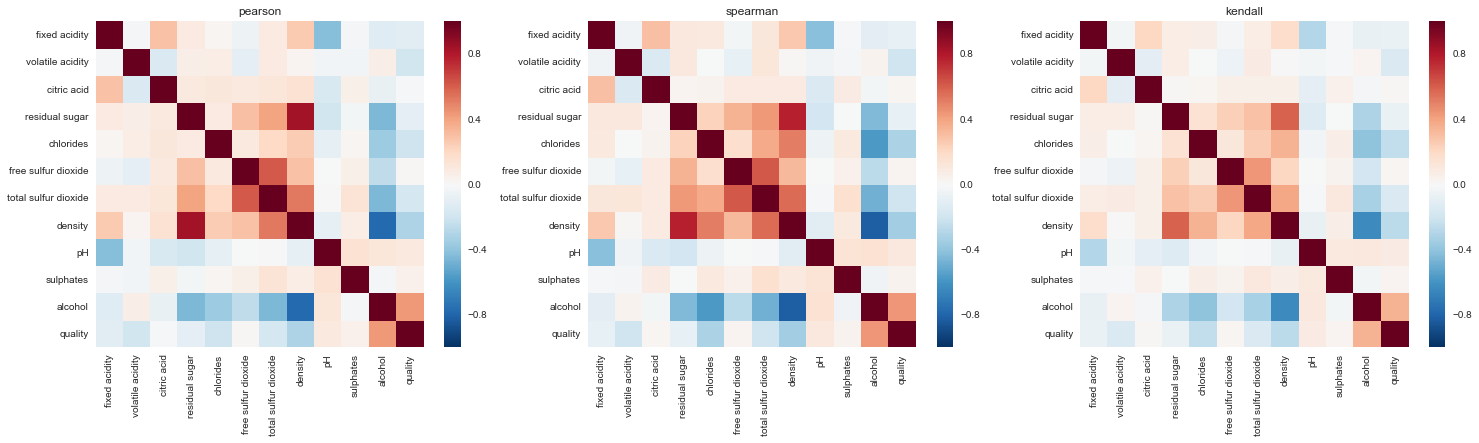

In [435]:
# test different correlation methods and visualize using heatmap
methods = ['pearson', 'spearman', 'kendall']

baseCorrs = csv.corr()
display(baseCorrs)

fig, axs = plt.subplots(ncols=3)
fig.set_figwidth(25)

for i, method in enumerate(methods):
    axs[i].set_title(method)
    corr = csv.corr(method=method)
    sns.set(rc={'figure.figsize':(8,8)})
    sns.heatmap(corr, ax=axs[i])

---

### Correlation analysis

#### Directly affecting quality :
* positive correlation between alcohol level and quality
* negative correlation between chlorides/quality and density/quality

#### Most "Correlated" features :
* density / residual sugars
* ph / fixed acidity (no shit sherlock)
* total sulfur dioxide / free sulfur dioxide (https://www.extension.iastate.edu/wine/total-sulfur-dioxide-why-it-matters-too)
* alcohol / density
* alcohol / chlorides
* alcohol / volatile acidity

#### Heatmap analysis
* Negative correlation between alcohol and { residual sugars, chlorides, free/total sulfur dioxide } (clustered in a line)
* Positive correlation between chlorides, sulfur dioxide and density (center square cluster)

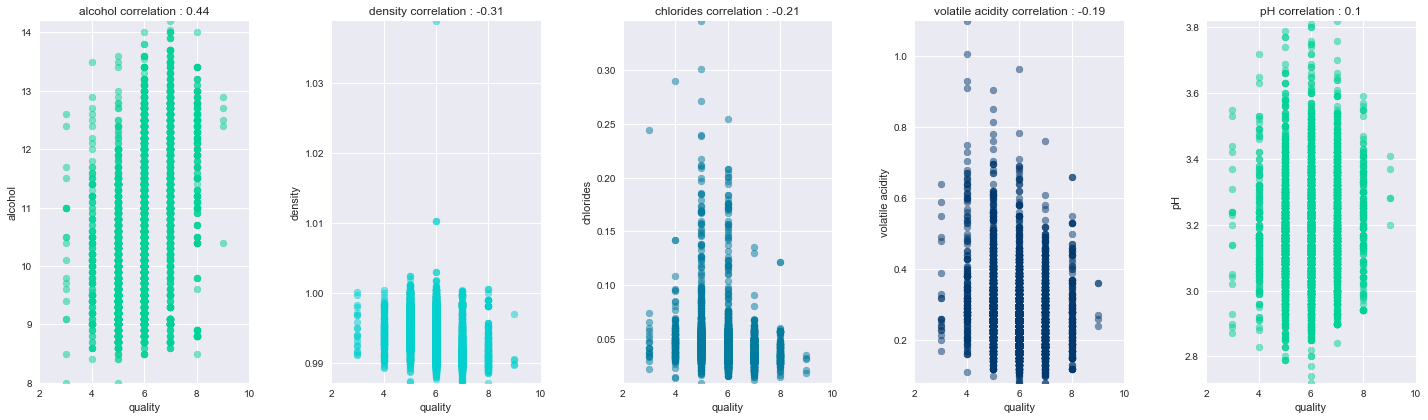

In [106]:
columns = ['alcohol', 'density', 'chlorides', 'volatile acidity', 'pH']
colors = ['#02D298', '#02D1CF', '#027C9E', '#01396E', '#02D298']
plt.rcParams['figure.figsize'] = [20, 6]
fig, axs = plt.subplots(ncols=len(columns))

for i, col in enumerate(columns):
    title = col + ' correlation : ' + str(round(baseCorrs['quality'][col], 2))
    axs[i].set_xlim([min(csv['quality']) - 1, max(csv['quality']) + 1])
    axs[i].set_ylim([min(csv[col]), max(csv[col])])
    axs[i].set_title(title)
    axs[i].set_ylabel(col)
    axs[i].set_xlabel('quality')

    axs[i].scatter(csv['quality'], csv[col], alpha=0.5, color=colors[i])

plt.tight_layout(w_pad=3)


In [436]:
# check the distribution of quality
qualities = csv['quality']
print('unique qualities :', qualities.nunique(), '\n')
print(qualities.value_counts())

unique qualities : 7 

6    2198
5    1457
7     880
8     175
4     163
3      20
9       5
Name: quality, dtype: int64


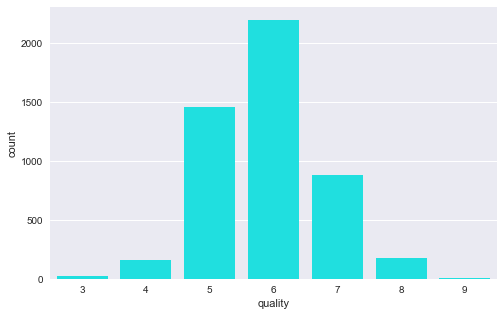

In [437]:
sns.set(rc={'figure.figsize':(8,5)})
sns.countplot(x='quality', data=csv, color='cyan');

---

### Distribution analysis

> Target output is categorical : `{3, 4, 5, 6, 7, 8, 9}`<br>
Could possibly be considered as *continuous* on an interval to fit a regression model ? 

#### Options :
* fit a model to get a continuous value between `[0, 10]` 💩
* fit a classifier : 
  * use current classes
  * transform Y in order to get more insightful data with new classes ( ie: `{ bad, average, good }` )

### Feature engineering

All of our features are continuous (except for quality output), they just need to be normalized before using them.

**> Create new output feature from quality for more insightful business meaning**

We previously saw that some features might be strongly correlated - we could try finding a new **"feature space"** with PCA before fitting a model

**> find number of components via variance analysis**

**> test model accuracy with/without PCA feature space**


> <small>https://towardsdatascience.com/an-approach-to-choosing-the-number-of-components-in-a-principal-component-analysis-pca-3b9f3d6e73fe</small>
> <small>http://setosa.io/ev/eigenvectors-and-eigenvalues/</small>
> <small>https://stats.stackexchange.com/questions/105592/not-normalizing-data-before-pca-gives-better-explained-variance-ratio</small>

average    2198
bad        1640
good       1060
Name: quality, dtype: int64

4893    average
4894        bad
4895    average
4896       good
4897    average
Name: quality, dtype: category
Categories (3, object): [bad < average < good]

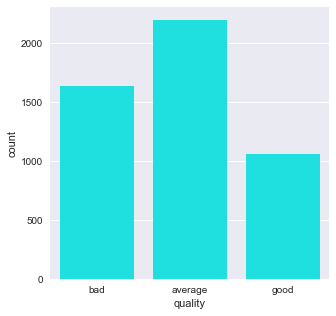

In [438]:
### new output feature for classifier based on current dataset distribution
# bad : [1..4]
# average : [5..6]
# good : [7..10]

bins = (1, 5, 6, 10) 
labels = ['bad', 'average', 'good']
y_categories = pd.cut(csv['quality'], bins=bins, labels=labels)

display(y_categories.value_counts())
display(y_categories.tail())

sns.set(rc={'figure.figsize':(5,5)})
sns.countplot(y_categories, color='cyan');

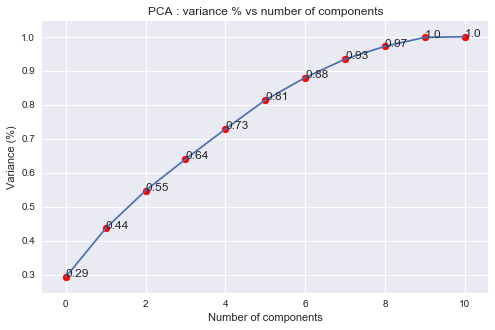

In [356]:
from sklearn.decomposition import PCA

pca = PCA().fit(X)
x_components = np.arange(len(pca.explained_variance_ratio_))
cumulative_variance_sum = np.cumsum(pca.explained_variance_ratio_)

sns.set(rc={'figure.figsize':(8,5)})
plt.figure()
plt.plot(cumulative_variance_sum) # cumulative sum
plt.title('PCA : variance % vs number of components')
plt.xlabel('Number of components')
plt.ylabel('Variance (%)')
plt.scatter(x_components, np.cumsum(pca.explained_variance_ratio_), c='red')

for i, value in enumerate(cumulative_variance_sum):
    plt.annotate(round(value, 2), (x_components[i], cumulative_variance_sum[i]))

plt.show()

#### PCA analysis
Variance analysis shows that :
* selecting 6 components maintains the dataset's variance up to 88%
* selecting 7 components maintains the dataset's variance up to 94%
* selecting 8 components maintains the dataset's variance up to 97%

In [439]:
pca = PCA(n_components=7)
df_pca = pd.DataFrame(pca.fit_transform(X)) # fit PCA on X_train
df_pca.columns = [f'Component {i + 1}' for i in df_pca.columns]

df_pca.head(5)

,Component 1,Component 2,Component 3,Component 4,Component 5,Component 6,Component 7
0,3.676944,-0.545233,-0.930422,-1.135374,-0.292855,-0.891620,0.204664
1,-0.644588,0.430770,-0.356331,0.999117,-0.714078,-0.483738,0.436998
2,0.155291,-1.189800,-0.017532,0.270219,-0.367706,-0.500682,0.554319
3,1.455374,0.099680,-0.001956,-0.423022,-0.469981,0.769261,-0.197702
4,1.455374,0.099680,-0.001956,-0.423022,-0.469981,0.769261,-0.197702


---

## Linear Regression
---


In [376]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

scaler = StandardScaler()

X = scaler.fit_transform(csv.iloc[:, :-1]) # drop output column
y = scaler.fit_transform(csv.iloc[:, -1:])

# stratify to make sure distribution of quality is the same in train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, stratify=y)

# degrees for polynomial features
degrees = np.arange(1, 4)

for degree in degrees:
    model = make_pipeline(
        PolynomialFeatures(degree=degree, include_bias=False),
        LinearRegression()
    )
    model.fit(X_train, y_train)

    # WARNING : NASTY HACK ☠️
    # trying to fit back continuous predictions to categorical values
    # -> rescale predictions, round down and apply bounds for accuracy score
    prediction = scaler.inverse_transform(model.predict(X_test))
    prediction_rescale = np.array(
        [
            min(x, [10]) if x > 0 else [1] for x in
            np.around(prediction)
        ]
    )
    y_test_rescale = scaler.inverse_transform(y_test) # transform back to original data

    print(f'--- n = {degree} -----------------------------\n')
    print('min predict before rescale : ', round(min(prediction)[0], 2))
    print('min predict after rescale  : ', round(min(prediction_rescale)[0], 2))
    print('max predict before rescale : ', round(max(prediction)[0], 2))
    print('max predict after rescale  : ', round(max(prediction_rescale)[0], 2))
    print('\n')
    print('>> model score    : ', round(model.score(X_test, y_test), 2))
    print('>> accuracy score : ', round((prediction_rescale == y_test_rescale).astype(int).mean(), 2)) # 💩
    print('\n')


--- n = 1 -----------------------------

min predict before rescale :  3.8
min predict after rescale  :  4.0
max predict before rescale :  7.39
max predict after rescale  :  7.0


>> model score    :  0.28
>> accuracy score :  0.51


--- n = 2 -----------------------------

min predict before rescale :  3.43
min predict after rescale  :  3.0
max predict before rescale :  8.02
max predict after rescale  :  8.0


>> model score    :  0.35
>> accuracy score :  0.53


--- n = 3 -----------------------------

min predict before rescale :  0.66
min predict after rescale  :  1.0
max predict before rescale :  9.15
max predict after rescale  :  9.0


>> model score    :  0.23
>> accuracy score :  0.52




---
#### Linear regression analysis 😪

<small>The linear regression model's score is penalized by the fact that our target output, although considered continuous, is actually categorical => *The accuracy score was obtained by trying to discretize our predicted values back to our dataset's values [0...10] and calculate a categorical accuracy score*</small>


Trying to fit a continuous value doesn't seem to be the right solution by looking at the evolution of its score as we increase the polynomial feature degree.

---

---

## Classification
---

Chosing the right model via :
* finding the optimal target classes by comparing different cuts in the data
* cross validating the f1 / recall / precision score

In [381]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import cross_validate, KFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# data bins to compare against different classifiers
cuts_in_data = [
    ((1, 5, 6, 10), ['bad', 'average', 'good']),
    ((1, 4, 7, 10), ['bad', 'average', 'good']),
    ((1, 6, 7, 10), ['bad', 'average', 'good']),
    ((1, 6, 10), ['bad', 'good']),
    ((1, 7, 10), ['bad', 'good'])
]

# standardize our data
scaler = StandardScaler()
X = scaler.fit_transform(csv.iloc[:, :-1]) # drop output column

results = {
    'f1': [],
    'precision': [],
    'recall': []
}

i = 0

# iterate on our different cuts
for bin, labels in cuts_in_data:
    # cut ouput into categories
    y_categorical = pd.cut(csv['quality'], bins=bin, labels=labels)
    X_train, X_test, y_train, y_test = train_test_split(X, y_categorical, test_size=0.3, stratify=y)
    
    print('### cuts in data : ', len(labels), bin, '#########################\n')
    print(y_categorical.value_counts())
    print('\n')
    
    # binarize our labels for our models
    label_binarizer = LabelBinarizer()
    y_train_binarized = label_binarizer.fit_transform(y_train)
    y_test_binarized = label_binarizer.transform(y_test)
    
    # models to evaluate - use default parameters
    models = [
        ('LogisticRegression     ', LogisticRegression()),
        ('DecisionTreeClassifier ', DecisionTreeClassifier()),
        ('RandomForestClassifier ', RandomForestClassifier()),
    ]
    
    for name, model in models:
        kfold = KFold(n_splits=10)
        score = cross_validate(
            # use our PCA transform to reduce number of dimensions and accelerate training
            OneVsRestClassifier(estimator=model), pca.transform(X_train), y_train,
            cv=kfold,
            scoring={'precision_macro', 'recall_macro', 'f1_macro'} # recall
        )
        print(f'(#{str(i).zfill(2)}) ', name,'----- recall score    : ', round(score['test_recall_macro'].mean(), 2))
        print('                               ----- f1 score        : ', round(score['test_f1_macro'].mean(), 2))
        print('                               ----- precision score : ', round(score['test_precision_macro'].mean(), 2))
        i += 1
        results['recall'].append(score['test_recall_macro'])
        results['precision'].append(score['test_precision_macro'])
        results['f1'].append(score['test_f1_macro'])
    print('\n\n')

### cuts in data :  3 (1, 5, 6, 10) #########################

average    2198
bad        1640
good       1060
Name: quality, dtype: int64


(#00)  LogisticRegression      ----- recall score    :  0.51
                               ----- f1 score        :  0.52
                               ----- precision score :  0.58
(#01)  DecisionTreeClassifier  ----- recall score    :  0.61
                               ----- f1 score        :  0.57
                               ----- precision score :  0.59
(#02)  RandomForestClassifier  ----- recall score    :  0.66
                               ----- f1 score        :  0.66
                               ----- precision score :  0.66



### cuts in data :  3 (1, 4, 7, 10) #########################

average    4535
bad         183
good        180
Name: quality, dtype: int64


(#03)  LogisticRegression      ----- recall score    :  0.34
                               ----- f1 score        :  0.33
                               ----- precisi

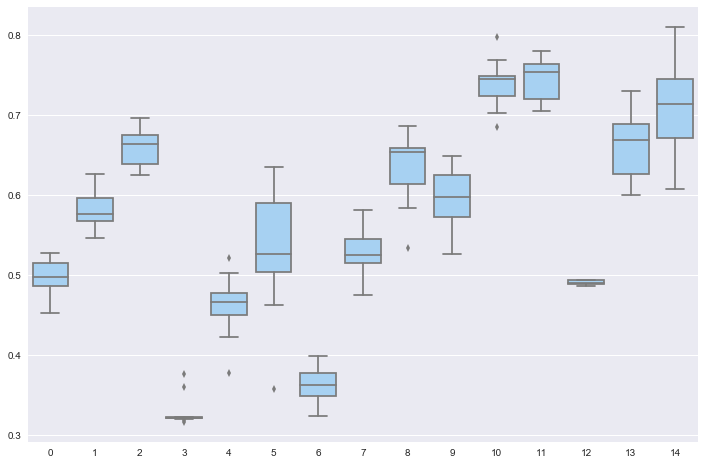

In [379]:
sns.set(rc={'figure.figsize':(12,8)})
sns.boxplot(data=results['f1'], color='#9AD2FF')

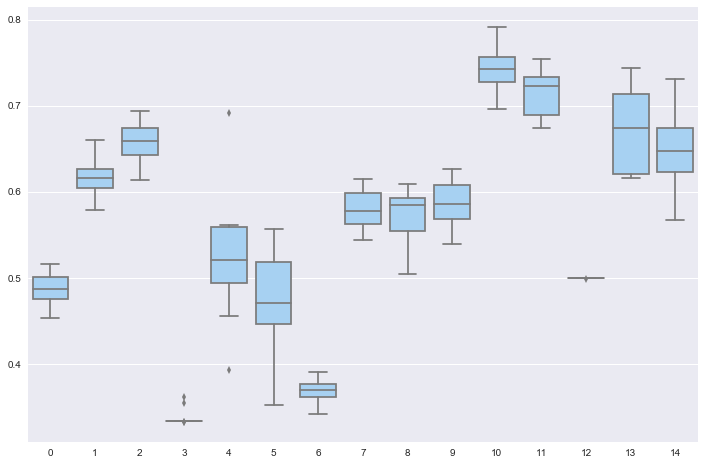

In [380]:
sns.set(rc={'figure.figsize':(12,8)})
sns.boxplot(data=results['recall'], color='#9AD2FF')

### Classifier selection

> precision is not enough to estimate the performance of a multi-class model

> **f1-score** takes into account precision AND recall

From the boxplots, clearly we can see that :
>* optimal cut for 3 categories is **(1, 5, 6, 10)**
>* optimal cut for 2 categories is **(1, 6, 10)**
> => these cuts have a better data distribution

> RandomForest seems to get the best results :
> * **0.67** f1-score with 3 categories 
> * **0.74** f1-score with 2 categories

###### Fine-tune RandomForestClassifier with optimal categories
We will try optimizing the model's hyperparameters and see how it affects its performance by using a RandomizedSearchCV
><small>https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74</small>

In [280]:
random_forest = RandomForestClassifier()
random_forest.get_params()

{'bootstrap': True,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 10,
 'n_jobs': 1,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [382]:
# WARNING : fitting RandomizedSearchCV will take some time
from sklearn.model_selection import RandomizedSearchCV

# params to fine-tune
n_estimators = np.arange(10, 220, 20) # number of trees
max_depth = [x for x in np.arange(10, 110, 10)]
max_depth.append(None)
min_samples_split = [2, 5, 10] # Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4] # Method of selecting samples for training each tree

grid = {
    'n_estimators': n_estimators,
    'max_depth': max_depth,
    'min_samples_split': min_samples_split,
    'min_samples_leaf': min_samples_leaf
}

best_bins = [(1, 5, 6, 10), (1, 6, 10)]
labels = [['bad', 'average', 'good'], ['bad', 'good']]
results = []

for i, best_bin in enumerate(best_bins):
    random_forest = RandomForestClassifier()
    random_search = RandomizedSearchCV(
        estimator = random_forest,
        param_distributions = grid,
        n_iter = 20,
        cv = 5
    )
    
    X_final = scaler.fit_transform(csv.iloc[:, :-1]) # drop output column
    y_categorical_final = pd.cut(csv['quality'], bins=best_bin, labels=labels[i])

    X_train_final, X_test_final, y_train_final, y_test_final = train_test_split(X_final, y_categorical_final, test_size=0.3, stratify=y)
    # random search for best hyperparams
    random_search.fit(pca_7.transform(X_train_final), y_train_final)
    results.append(random_search.best_params_)
    
print('done !')

done !


In [440]:
model_classes = ['3 classes', '2 classes']

for i, result in enumerate(results):
    print('### optimal hyperparams for ', model_classes[i], '########')
    for key, value in result.items():
        print(key, '=', value)
    print('\n')

### optimal hyperparams for  3 classes ########
n_estimators = 150
min_samples_split = 2
min_samples_leaf = 1
max_depth = 90


### optimal hyperparams for  2 classes ########
n_estimators = 210
min_samples_split = 5
min_samples_leaf = 1
max_depth = 60




In [460]:
# helpers for confusion matrix viz
from sklearn.metrics import confusion_matrix, classification_report

def displayConfusionMatrixHeatMap(y_true, y_pred, title, labels, ax):
    confusion_matrix_train = confusion_matrix(y_true, y_pred, labels=labels)
    # normalize confusion matrix to assess performance
    cmt = (confusion_matrix_train.astype('float') / confusion_matrix_train.sum(axis=1))
    heatmap = sns.heatmap(
            cmt, annot=True, fmt="f",
            xticklabels=labels, yticklabels=labels,
            ax=ax
    )
    heatmap.set_title(title)
    display(heatmap)

x_train_score :  1.0
x_train_oob_score :  0.7954
x_test_score :  0.585


             precision    recall  f1-score   support

    average       0.62      0.83      0.71       660
        bad       0.76      0.62      0.68       492
       good       0.88      0.51      0.65       318

avg / total       0.72      0.69      0.69      1470



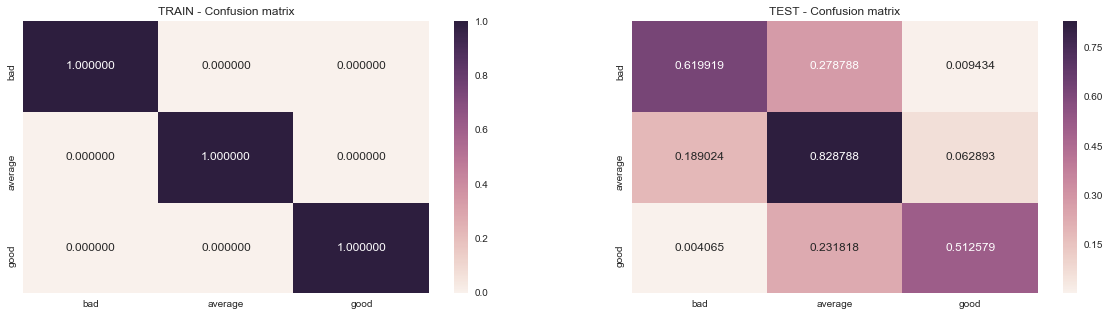

In [461]:
def classify(bins, labels, n_estimators, min_samples_split, min_samples_leaf, max_depth):
    scaler = StandardScaler()
    label_binarizer = LabelBinarizer()

    X = scaler.fit_transform(csv.iloc[:, :-1]) # drop output column
    y_categorical = pd.cut(csv['quality'], bins=bins, labels=labels)
    X_train, X_test, y_train, y_test = train_test_split(X, y_categorical, test_size=0.3, stratify=y)

    y_train_binarized = label_binarizer.fit_transform(y_train)
    y_test_binarized = label_binarizer.transform(y_test)
    
    model = RandomForestClassifier(
        n_estimators=n_estimators,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        max_depth=max_depth,
        bootstrap=True,
        oob_score=True
    )
    
    model.fit(pca.transform(X_train), y_train_binarized)

    # OOB SCORE
    # This metric is the accuracy of examples 𝑥𝑖 using all the trees in the random forest ensemble
    # for which it was omitted during training. Thus it kind of acts as a semi-testing instance.
    # You can get a sense of how well your classifier can generalize using this metric.

    x_train_score = model.score(pca.transform(X_train), y_train_binarized)
    x_train_oob_score = model.oob_score_
    x_test_score = model.score(pca.transform(X_test), y_test_binarized)

    print('x_train_score : ', round(x_train_score, 4))
    print('x_train_oob_score : ', round(x_train_oob_score, 4))
    print('x_test_score : ', round(x_test_score, 4))
    
    y_true_train = label_binarizer.inverse_transform(y_train_binarized)
    y_pred_train = label_binarizer.inverse_transform(model.predict(pca.transform(X_train)))

    y_true_test = label_binarizer.inverse_transform(y_test_binarized)
    y_pred_test = label_binarizer.inverse_transform(model.predict(pca.transform(X_test)))
    
    fig, axs = plt.subplots(ncols=2)
    fig.set_figwidth(20)
    displayConfusionMatrixHeatMap(y_true_train, y_pred_train, 'TRAIN - Confusion matrix', labels, axs[0])
    displayConfusionMatrixHeatMap(y_true_test, y_pred_test, 'TEST - Confusion matrix', labels, axs[1])

    print(classification_report(y_true_test, y_pred_test))

classify(
    bins=(1, 5, 6, 10),
    labels=['bad', 'average', 'good'],
    n_estimators = 150,
    min_samples_split = 2,
    min_samples_leaf = 1,
    max_depth = 90
)

> Comparison of TRAIN and TEST confusion matrices shows the model overfitting with a perfect train confusion matrix. It does not generalize well against new data :
* **61%** correctly on *average* wines
* **85%** correctly on *bad* wines
* **52%** correctly on *good* wines

> Classification report shows an average f1-score of **70%**, we can probably do better by classifying only 2 categories

x_train_score :  0.9982
x_train_oob_score :  0.8661
x_test_score :  0.8755


             precision    recall  f1-score   support

        bad       0.89      0.96      0.92      1152
       good       0.80      0.57      0.66       318

avg / total       0.87      0.88      0.87      1470



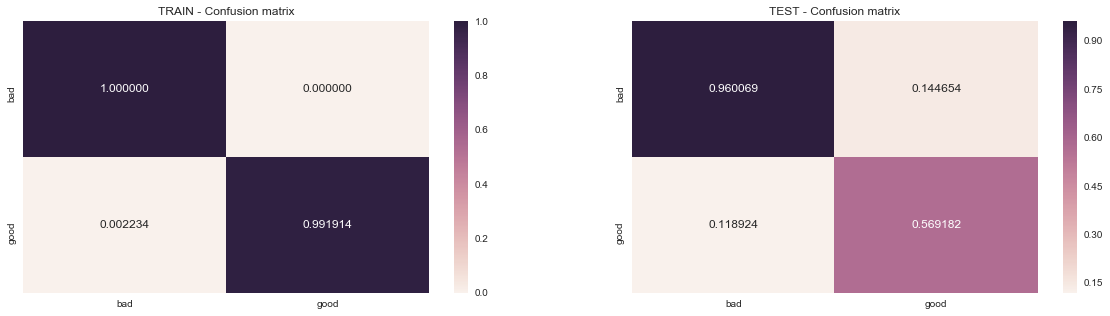

In [463]:
classify(
    bins=(1, 6, 10),
    labels=['bad', 'good'],
    n_estimators = 210,
    min_samples_split = 5,
    min_samples_leaf = 1,
    max_depth = 60
)

> Classifier is over-fitting a little less but reacts better to TEST data :
* **96%** correctly on *bad* wines
* **56%** correctly on *good* wines

> Classification report shows a better average f1-score of **86%**, although we're losing information by only classifying 2 categories.